[iris 데이터셋을 활용한 꽃잎 너비 예측]
- 데이터셋: iris.csv에서 2개의 feature 사용
- 구현 프레임워크: Pytorch

[1] 모듈 로딩 및 데이터 준비

In [1]:
#모듈 로딩
import torch                        #텐서 및 수치 계산 함수 관련 모듈
import torch.nn as nn               #인공신경망 관련 모듈
import torch.nn.functional as F        #손실함수, 거래함수 등 관련 모듈
import torch.optim as optimizer     #최적화 기법 관련 모듈

In [2]:
import pandas as pd

In [3]:
#데이터 로딩:  csv -> DataFrame
data_file='../data/iris.csv'
irisDF=pd.read_csv(data_file,usecols=[2,3])
irisDF.head(2)

,petal.length,petal.width
0,1.4,0.2
1,1.4,0.2


[2] 모델 준비
- 학습 방법: 지도학습 중 회귀
- 알고리즘: 선형모델 (nn.Linear)


In [4]:
#in_features: petal.length 1개
#out_features: petal.width 1개

model=nn.Linear(1,1)

In [5]:
#가중치와 절편 확인
for name, param in model.named_parameters():
    print(f'[{name}] {param} \n')

[weight] Parameter containing:
tensor([[-0.4465]], requires_grad=True) 

[bias] Parameter containing:
tensor([-0.7782], requires_grad=True) 



[3] 최적화 인스턴스 준비

In [6]:
#모델의 가중치와 절편 최적화 -> 인스턴스에 전달
adam_optim=optimizer.Adam(model.parameters(),lr=0.1)

[4] 학습: 개발자가 구현
1) DS Tensor화
- 데이터 준비 시 진행하거나 학습 전 진행
    - 하고싶을 때 하면 된다~~~~~~~

In [7]:
featureTS=torch.from_numpy(irisDF[['petal.length']].values).float()
featureTS.shape

torch.Size([150, 1])

In [8]:
targetTS=torch.from_numpy(irisDF[['petal.width']].values).float()
targetTS.shape

torch.Size([150, 1])

2) 학습 진행
- 학습 횟수 결정: 에포크 설정
- 학습 결과 저장: 손실 저장 변수 생성

In [9]:
EPOCH=10          #1부터 돌리면서 error 확인하기


In [10]:
#모델 학습 함수

def training(): 

    loss_history=[]

    for epoch in range(EPOCH):
        #학습 진행 - forward
        pre_y=model(featureTS)

        #오차 계산 - 손실함수
        loss=F.mse_loss(pre_y,targetTS)
        loss_history.append(loss.item())

        #최적화 -  가중치, 절편 업데이트(backward)
        adam_optim.zero_grad()
        loss.backward()
        adam_optim.step()

        #학습 결과 출력 및 저장
        print(f'[{epoch}/{EPOCH}] LOSS: {loss}')

    return loss_history

In [15]:
#모델 학습 진행
loss=training()

[0/10] LOSS: 0.9032248854637146
[1/10] LOSS: 0.650210976600647
[2/10] LOSS: 0.4281255006790161
[3/10] LOSS: 0.253324955701828
[4/10] LOSS: 0.134414941072464
[5/10] LOSS: 0.07234187424182892
[6/10] LOSS: 0.06128096207976341
[7/10] LOSS: 0.09020490944385529
[8/10] LOSS: 0.14493225514888763
[9/10] LOSS: 0.21037474274635315


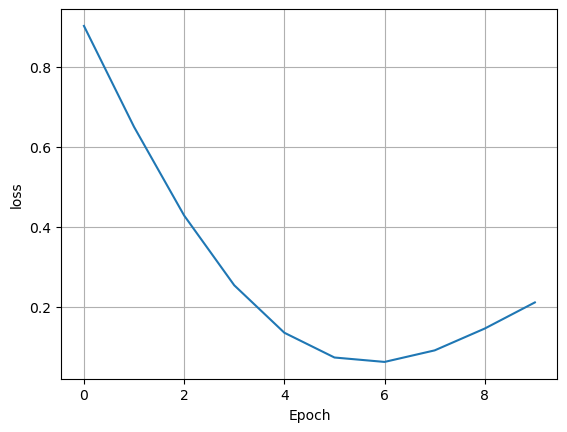

In [17]:
#학습 후 loss 시각화
import matplotlib.pyplot as plt

plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.grid()
plt.show()